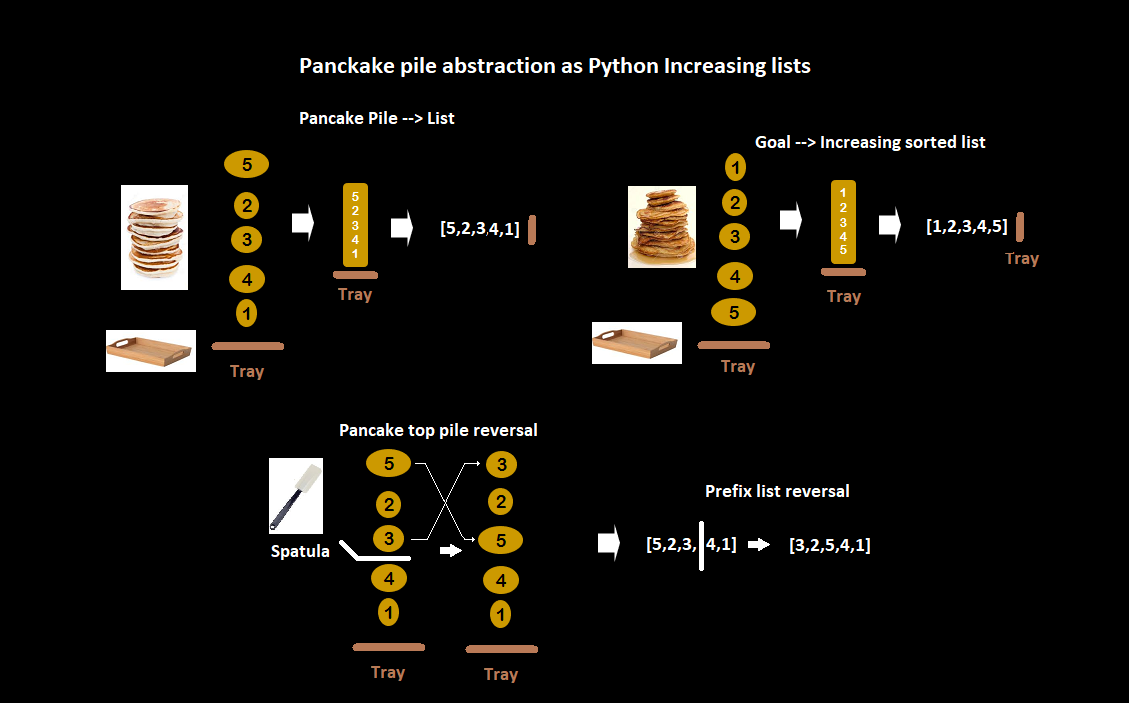

### 1. Modify the PancakesTrees.ipynb code in your own to plot the Pancake Network and calculate Pn for smal n‘s.

In [3]:
import pydot
from collections import defaultdict 
from IPython.display import Image, display
import random
import pandas as dd
from datetime import datetime
from tqdm import tqdm
from time import sleep

In [4]:
def lstr(p):
        return ''.join([str(elem)  for elem in p])

In [18]:
def ModifiedBFS(s): 

        # Create dictionaries graph,visited and pydot graph G
        graph = defaultdict()
        visited = defaultdict()
        G = pydot.Dot(graph_type="digraph")
        
        # Create a queue for BFS 
        queue = [] 
  
        # Mark the source node as visited and enqueue it 
        queue.append(s) 
        visited[lstr(s)] = True
        
        while queue: 
  
            # Dequeue a vertex from queue 
            s = queue.pop(0) 
            graph[lstr(s)]=[]
            node = pydot.Node(lstr(s))
            G.add_node(node)
            
            # Get all adjacent vertices of the 
            # dequeued vertex s. If a adjacent 
            # has not been visited, then mark it 
            # visited and enqueue it 
            if(s != sorted(s)):
              for i in range(len(s)-1):
                d = s[i+1::-1] + s[i+2:]  
                if (d != s) and not(lstr(d) in visited.keys()):
                 
                  if(d != sorted(d)):
                    node = pydot.Node(lstr(d))
                  else:
                    node = pydot.Node(lstr(d),style="filled", fillcolor="green") # first sorted green
                  
                  G.add_node(node)
                  edge = pydot.Edge(lstr(s),lstr(d))
                  G.add_edge(edge)
                  graph[lstr(s)].append(lstr(d))
                  queue.append(d) 
                  visited[lstr(d)] = True 
              
        # Dsplay the pydot graph G
        im = Image(G.create_png())
        display(im)

Arbor.



digite el tamaño del dato:  4


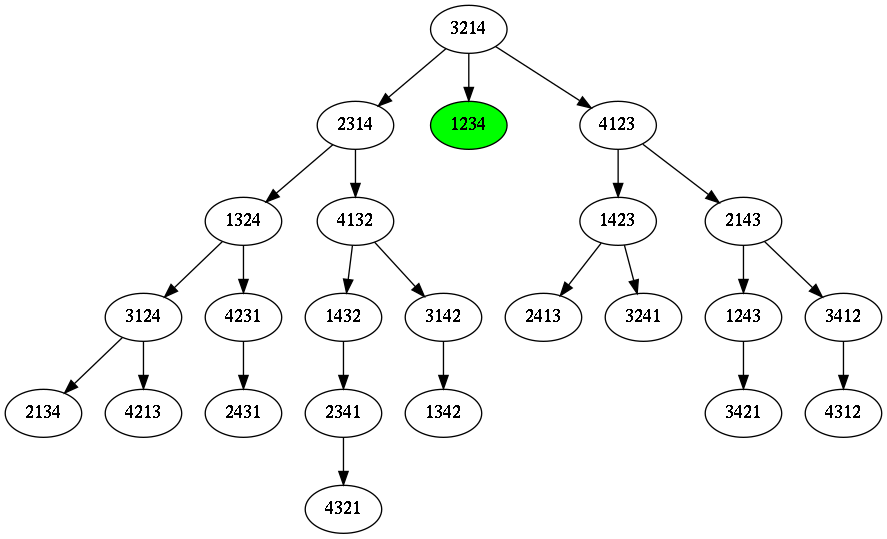

In [19]:
print("Arbor.\n")
a = int(input("digite el tamaño del dato: "))
p = []
for i in range(a):
    p.append(i+1)

random.shuffle(p)
            
ModifiedBFS(p)

### 2. Modify the PancakesTrees.ipynb code leaving only the necessary code and data structures required to calculate the Pn and run the code for at least one night (8 hours) starting with n=5. What is the largest Pn calculated? (Save the results in drive to avoid losing them)

In [9]:
def get_best(s):
    visited = defaultdict()
    # Create a queue for BFS 
    queue = [] 

    # Mark the source node as visited and enqueue it 
    queue.append([s,0]) 
    visited[lstr(s)] = True

    while queue: 

        # Dequeue a vertex from queue 
        e = queue.pop(0)
        s = e[0]
        l = e[1] 

        if(s != sorted(s)):
          for i in range(len(s)-1):
            d = s[i+1::-1] + s[i+2:]  
            if (d != s) and not(lstr(d) in visited.keys()):
              if(d == sorted(d)):
                return l+1
              queue.append([d,l+1]) 
              visited[lstr(d)] = True 
        else:
          return 0

In [14]:
def superior(r):
    a = r[0]
    
    for i in r:
        if(a[-1]<i[-1]):
            a=i
    return(a)
            

In [8]:
# def Rorden(p):
#     t = []
def inserta(x, lst, i):
    """Devuelve una nueva lista resultado de insertar
       x dentro de lst en la posición i.
    """
    return lst[:i] + [x] + lst[i:]

def inserta_multiple(x, lst):
    """Devuelve una lista con el resultado de
       insertar x en todas las posiciones de lst.  
    """
    return [inserta(x, lst, i) for i in range(len(lst) + 1)]

def permuta(c):
    """Calcula y devuelve una lista con todas las
       permutaciones posibles que se pueden hacer
       con los elementos contenidos en c.
    """
    if len(c) == 0:
        return [[]]
    return sum([inserta_multiple(c[0], s)
                for s in permuta(c[1:])],
               [])

def imprime_ordenado(c):
    """Imprime en la salida estándar todos los
       subconjuntos del conjunto c (una lista de
       listas) ordenados primero por tamaño y
       luego lexicográficamente. Cada subconjunto
       se imprime en su propia línea. Los
       elementos de los subconjuntos deben ser
       comparables entre sí, de otra forma puede
       ocurrir un TypeError.
    """
    p = []
    for e in sorted(c, key=lambda s: (len(s), s)):
        p.append(e)
    return p

In [17]:
# print("Arbor.\n")
a = 5
pe = []
c = 1
for i in range(a):
    c = c*(i+1)
    pe.append(i+1)
     
# e = 17

with dd.ExcelWriter('pandas.xlsx') as writer:
    
#     e += 1
    
    while(a<=8):
        print("Facee " + str(a))
        c = imprime_ordenado(permuta(pe[:]))
        b = len(c)
        pf = dd.DataFrame()
        h = 1
        r = []
        for p in tqdm(c):
            #print(p)
            g = p[:]
            g.append((int)(get_best(g)))
            r.append(g)
            pf[h] = g
#             print(h, " | ", end="")
            h+=1
            sleep(0.2)
        pf["MAYOR"] = superior(r)
        
        pf.T.to_excel(writer, sheet_name='P.'+str(a), index=True)
        
        a +=1
        pe.append(a)
    
    print("final " + str(a-1))

Facee 8


  4%|▍         | 1676/40320 [18:51<7:14:38,  1.48it/s] 


IndexError: At least one sheet must be visible